In [1]:
import QSTK.qstkutil.qsdateutil as du
import datetime as dt
from datetime import timedelta
import numpy as np
import pandas as pd
import time 
from event_value_below import *

start = time.time()
dt_start = dt.datetime(2008, 1, 1)
dt_end = dt.datetime(2009, 12, 31)

evo = EventOrders("sp5002012", dt_start, dt_end)
events = evo.find_events_vectorized(6.0)
print "found %s events" % (len(events))
ldt_sell = evo.get_offset_timestamps(events.index, days_offset=5)
orders = evo.create_event_orders(events, ldt_sell)

end = time.time()
print "%s Orders created in %ss." % (orders.count(0), end - start)
orders[["year","month","day","symbol","action","amount"]].head()
#.to_csv(columns=["year","month","day","stock","order","amount"]).head()

found 227 events
symbol    454
action    454
year      454
month     454
day       454
amount    454
dtype: int64 Orders created in 0.94722700119s.


,year,month,day,symbol,action,amount
date,,,,,,
2008-01-10 16:00:00,2008,1,10,AMD,Buy,100
2008-01-16 16:00:00,2008,1,16,MU,Buy,100
2008-01-17 16:00:00,2008,1,17,AMD,Sell,100
2008-01-22 16:00:00,2008,1,22,F,Buy,100
2008-01-24 16:00:00,2008,1,24,MSI,Buy,100


In [2]:
portfolio = evo.simulate(orders)
print portfolio.head()
print portfolio.tail()

returns = evo.analyze(portfolio, "drop_below_6.0")


                     day  month  year  portfolio
2008-01-02 16:00:00    2      1  2008    50000.0
2008-01-03 16:00:00    3      1  2008    50000.0
2008-01-04 16:00:00    4      1  2008    50000.0
2008-01-07 16:00:00    7      1  2008    50000.0
2008-01-08 16:00:00    8      1  2008    50000.0
                     day  month  year  portfolio
2009-12-23 16:00:00   23     12  2009    65879.0
2009-12-24 16:00:00   24     12  2009    65883.0
2009-12-28 16:00:00   28     12  2009    65880.0
2009-12-29 16:00:00   29     12  2009    65876.0
2009-12-30 16:00:00   30     12  2009    65884.0
Details of the Performance of the portfolio :
Data Range :  2008-01-02 16:00:00  to  2009-12-30 16:00:00

Sharpe Ratio of Fund : 3.0421498956604833
Sharpe Ratio of $SPX : -0.26217244492704994

Total Return of Fund :  1.31768
Total Return of $SPX : 0.7783659028718317

Standard Deviation of Fund :  0.004102644422673469
Standard Deviation of $SPX : 0.021939115265472563

Average Daily Return of Fund :  0.00055594

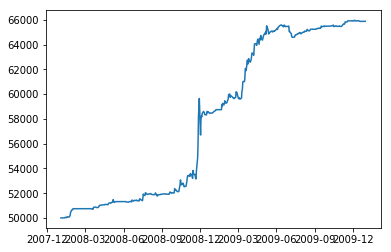

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(returns["$SPX"])
plt.plt(returns["portfolio"])


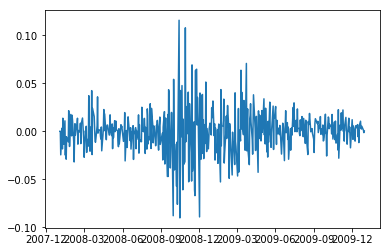

In [4]:
portfolio["$SPX"]
plt.figure()
plt.plot(portfolio["$SPX"])